# *Exercise 1* - Bifurcations with one parameter




For the first exercise we have been given 4 one-dimensional differential equations:

$X'_1 = rX + X^3 - X^5$

$X'_2 = rX + X^2 - X^3$

$X'_3 = rX - \frac{X}{1+X^2}$

$X'_4 = X - r + \frac{2-X}{1+X^2}$

With each differential equation representing a dynamical system, each system contains different points of equilibria determined by said equations. Each point of equilibrium is either stable or unstable. In this first exercise we will examine how the value of parameter r influences the stability of these equilibria.

We will start off where every code starts off, importing the utilised libraries.

In [ ]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt

We will define a function which will, when given the ID of a dynamical system (ranging from 1 to 4 where 1 corresponds with the first differential equation, 2 with the second, and so forth) and a value for r, return the coefficients of the polynomial associated with that dynamical system. Note that for the equations with rational terms (see differential equations 3 and 4), we can't assign just some integer as its coefficient. To get around this, one has two options: make 3 tuples of coefficients of the denominator, numerator and polynomial term. Or when realising we will utilise said equation for finding points of equilibria via $X' = 0$, we can multiply the entire equation by the term given by the denominator in the rational term. Our equation will subsequently be turned into a polynomial. To keep things as simple as possible, we will turn to the second option.

In [ ]:
def get_system_coefficients(system,r):
    if system == 1:
        return (-1,0,1,0,r,0)
    elif system == 2:
        return (-1,1,r,0)
    elif system == 3:
        return (r,0,r-1,0)
    else:
        return (1,-r,0,-r+2)

It is possible for $r$ to be an array, so that we may take multiple values of $r$ into a calculation/function. Take for example the coefficients

 (1,6,[2 3 5],0).

We have multiple values for a certain coefficient, hence we must interpret this as multiple equations where this one coefficient varies:
$X^3+6X^2+2X, X^3+6X^2+3X, X^3+6X^2+5X$.

The functions *extend_coefficients* will, when given a tuple of coefficients with one array-like element, return a list of arrays where the other integer coefficients have been duplicated to match the shape of the other coefficient. For our example coefficients the output will look like:

[[1 1 1],[6 6 6],[2 3 5],[0 0 0]]

In [ ]:
def extend_coefficients(coefficients):
    extended_coefficients,shape_of_extension = [],(1,)
    for element in coefficients:
        if isinstance(element,np.ndarray):
            shape_of_extension = np.shape(element)
            break
    for coefficient in coefficients:
        if isinstance(coefficient,np.ndarray):
            extended_coefficients.append(coefficient)
        else:
            extended_coefficients.append(np.full((shape_of_extension),coefficient))
    return extended_coefficients


*get_roots* will, when given a sequence of integers (or same size arrays of integers), return a (sequence of) solution(s) to $X'=0$ associated with the coefficients and its equation.

In [ ]:
def get_roots(coefficients):
    roots = []
    if isinstance(coefficients[0],float) or isinstance(coefficients[0],int):
        roots.append(np.roots(np.array(coefficients)))
    else:
        for i in range(len(coefficients[0])):
            roots.append(np.roots(np.array(coefficients)[ :,i]))
    return roots

The problem with the *get_roots* function is that it gives both *real* and *complex* solutions to the given equation. Complex solutions correspond with a complex point of equilibrium, which don't have a physical meaning. Hence we must filter these complex solutions via *get_real_roots* which will, when given a sequence of solutions, return the real solutions(our points of equilibria).

In [ ]:
def get_real_roots(roots):
    real_roots = []
    for root in roots:
        index = np.imag(root) == 0
        complex_roots = (np.array(root)[index])
        real_roots.append(complex_roots.real)
    return (np.array(real_roots,dtype = np.ndarray))

Now that we are able to get the points of equilibria for any value of $r$ per system, we need to find out what the stability of each point of equilibrium is.

*stability_system* will, when given a point on the X-axis, a value for $r$ and an ID of the system, return the value of $X''$ evaluated in that point. If the return is negative, the point is stable. If not, it is unstable.

In [ ]:
def stability_system(X,r,system):
    if system == 1:
        return -5*X**4 + 3*X**2 + r
    elif system == 2:
        return -3*X**2 + 2*X + r
    elif system == 3:
        return r - (((1+X**2)-(2*X**2))/((1+X**2)**2))
    else:
        return 1 + (((-1-X**2)-(2-X)*(2*X))/((1+X**2)**2))

*get_stable_equilibria*, when given an array-like sequence of points of equilibria, values of $r$ and the ID of the system, will return an array-like sequence with only the stable equilibria

In [ ]:
def get_stable_equilibria(points_of_equilibria,r,system):
    index_stable_eq = stability_system(points_of_equilibria,r,system) <= 0
    return points_of_equilibria[index_stable_eq]

*get_unstable_equilibria* will have the same purpose as the previous function, the only difference being that this function will return the unstable points of equilibria

In [ ]:
def get_unstable_equilibria(points_of_equilibria,r,system):
    index_unstable_eq = stability_system(points_of_equilibria,r,system) > 0
    return points_of_equilibria[index_unstable_eq]

*show_system_ifo_r* will assist in the plotting of our points of equilibria in function of $r$.

In [ ]:
def show_system_ifo_r(r, system, ax):
    points_of_equilibria = get_real_roots(get_roots(extend_coefficients((get_system_coefficients(system,r)))))
    for i in range(len(points_of_equilibria)):
        stable_eq = get_stable_equilibria(points_of_equilibria[i],r[i],system)
        unstable_eq = get_unstable_equilibria(points_of_equilibria[i],r[i],system)

        shape_of_stable_eq = (len(stable_eq),)
        shape_of_unstable_eq = (len(unstable_eq),)

        if stable_eq.size > 0:
            ax.scatter(np.full(shape_of_stable_eq,r[i]),stable_eq,color = 'green',s = 1)
        if unstable_eq.size > 0:
            ax.scatter(np.full(shape_of_unstable_eq,r[i]),unstable_eq,color = 'red',s = 1)

We will now visualize each dynamical system using the previously mentioned functions.

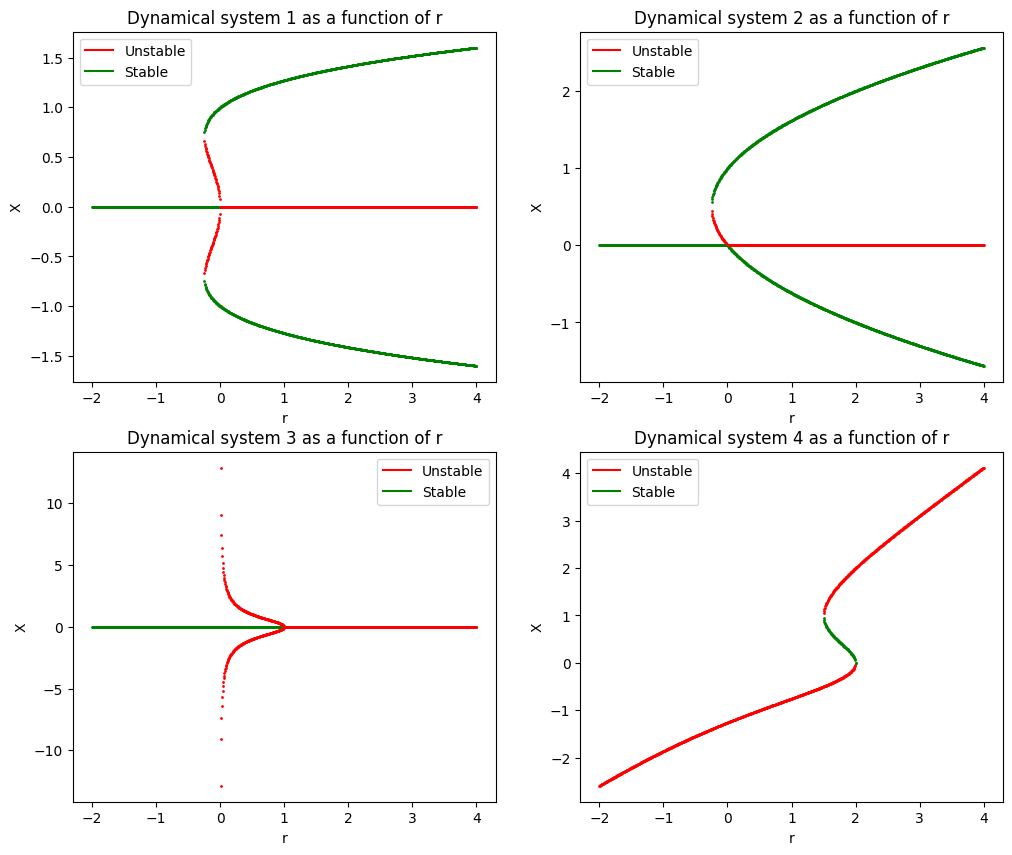

In [ ]:
fig, axs = plt.subplots(2,2,figsize = (12,10))
r = np.linspace(-2,4,1000)

for i in range(4):
    show_system_ifo_r(r,i+1,axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel('r')
    axs[i//2,i%2].set_ylabel('X')
    axs[i//2,i%2].plot(0,0,color = 'red', label = 'Unstable')
    axs[i//2,i%2].plot(0,0,color = 'green', label = 'Stable')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].set_title(f'Dynamical system {i+1} as a function of r')

***For the first dynamical system:***

We can see that for $r< -0.25$, we a singular stable equilibrium. For $r = 0.25$ we have two simultaneous saddle-node bifurcations, meaning that we have $5$ points of equilibria. If we increase $r$ further, we can see that the unstable equilibria from the saddle-node bifurcations collide and merge into the $X=0$ equilibria in a pitchfork-bifurcation like manner at $r=0$(*). And which will consequently result in a switch in stability for the $X=0$ equilibrium.

(*)At r=0 the stability of the equilibrium is undefined, since it's a saddle-point. i.e. when a point of equilibrium swaps stability, there is a saddle-point in between where the stability is undefined.

***For the second dynamical system:***

We see that again for $r< 0.25$ there is a singular point of equilibrium at $X=0$. When $r = 0.25$, there is a saddle-node bifurcation. Where the 'path of the unstable equilibrium' will collide with our $X=0$ equilibrium. This will result in a transcritical bifurcation, implying that the equilibria swap stability.

***For the third dynamical system:***

We again have a $X = 0$ equilibrium which will, at $r = 1$, swap stability caused by a pitchfork bifurcation, which gives birth to two unstable equilibria.

***For the fourth and final dynamical system:***

We have two saddle-node bifurcations with some inter-play between them. For $r>1.50$ we have one equilibrium. For $1.50< r < 2$ we have 3 equilibrium, and if $r$ surpasses $2$, the system will devolve to one point of equilibrium once again.




To further visualize the effect of $r$ on the position of the points of equilibria, we will construct a widget which will let you vary $r$ and choose the system, the points of equilibria associated with the chosen values, will be shown via *show_points_of_equilibria*.



In [ ]:
def show_points_of_equilibria(r,system):
    coefficients = get_system_coefficients(system,r)
    roots = get_real_roots(get_roots((coefficients)))
    for root in roots[0]:
        if stability_system(root,r,system) > 0:
            plt.scatter(root,0,color='red',s=40)
        elif stability_system(root,r,system) == 0:
            plt.scatter(root,0,color='purple',s=40,label = 'Undefined')
        else:
            plt.scatter(root,0,color='green',s=40)

    plt.plot(0,0,color='green', label = 'Stable')
    plt.plot(0,0,color='red', label = 'Unstable')
    plt.legend()
    plt.plot(np.linspace(-5,5,2),(0,0), color = 'silver', linestyle = '--')
    plt.xlabel('X')
    plt.yticks([])

    plt.show()

In [ ]:
ipywidgets.interact(show_points_of_equilibria, r = (-2,4,0.25), system = [1,2,3,4])

interactive(children=(FloatSlider(value=1.0, description='r', max=4.0, min=-2.0, step=0.25), Dropdown(descript…

<function __main__.show_points_of_equilibria(r, system)>

# *Exercise 2* - Bifurcations with two parameters - Fish



A fish population in a fish pound is described by the following differential equation:

$N' = rN(1-\frac{N}{K}) - H\frac{N}{A+N}$

Where we know that $A\le K$ and $A,K,r,H>0$ . Note that the first term is the standard logistic growth term and that the second term is a non-linear term caused by fishing.

One can rewrite this equation when substituting $x = \frac{N}{K}$, $\tau = rt$, $a = \frac{A}{K}$ and $h = \frac{H}{rK}$ with a < 1 as:

$\frac{Krdx}{d\tau} = rxK(1-x) - hrK\frac{Kx}{aK + Kx}$

$\implies \frac{dx}{d\tau} = x(1-x) -h(\frac{x}{a+x})$

And so we can reduce the equation to one with only have two parameters.


We can also try to give physical interpretation to our newly found parameters and variables: $x$ can be seen as the percentage of the maximum population of fish, since it can't go above $1$ in accordance with our limitations. Since our second term is related to fishing, when $h$ gets larger, so does the loss of fish due to fishing. Hence one may assume that $h$ corresponds with the amount of fishers, or the effectiveness of their fishing. The greater the value for $a$, the smaller the loss due to fishing, so one can deduce that $a$ is the evasiveness of fishes, or the skepticism of the fishes to go for bait.

For practical reasons(for the np.root method) we will reduce said equation to a polynomial when $X'=0$ as:

$0 = x(1-x)(a+x) - hx$

$\implies 0=xa + x^2 -ax^2-x^3-hx$

$\implies 0 = -x^3 + (1-a)x^2 + (a-h)x$

Which give rise to the descending coefficients of the equation:
[-1,1-a,a-h,0]

Starting of again with importing the utilised libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
from matplotlib.animation import FuncAnimation
from IPython import display

A lot of functions have been copied from the previous exercise, and thus we will not discuss them here again. *get_coefficients* replaces *get_system_coefficients* from the previous exercise, since we are only dealing with one dynamical system. *get_coefficients* will, when given values for $a$ and $h$, return the coefficients, or array-like sequence of coefficients corresponding with the given values for the parameters.

In [ ]:
def get_coefficients(a,h):
    return (-1,1-a,a-h,0)

In [ ]:
def extend_coefficients(coefficients):
    extended_coefficients,shape_of_extension = [],(1,)
    for element in coefficients:
        if isinstance(element,np.ndarray):
            shape_of_extension = np.shape(element)
            break
    for coefficient in coefficients:
        if isinstance(coefficient,np.ndarray):
            extended_coefficients.append(coefficient)
        else:
            extended_coefficients.append(np.full((shape_of_extension),coefficient))
    return extended_coefficients

In [ ]:
def get_roots(coefficients):
    roots = []
    if isinstance(coefficients[0],float) or isinstance(coefficients[0],int):
        roots.append(np.roots(np.array(coefficients)))
    else:
        for i in range(len(coefficients[0])):
            roots.append(np.roots(np.array(coefficients)[ :,i]))

    return roots

In [ ]:
def get_roots(coefficients):
    roots = []
    for i in range(len(coefficients[0])):
        roots.append(np.roots(np.array(coefficients)[ :,i]))
    return roots

In [ ]:
def get_real_roots(roots):
    real_roots = []
    for root in roots:
        index = np.imag(root) == 0
        complex_roots = (np.array(root)[index])
        real_roots.append(complex_roots.real)
    return (np.array(real_roots,dtype = np.ndarray))

*get_roots_from_coefficient* is a composition of the previously mentioned functions.

In [ ]:
def get_roots_from_parameters(a,h):
    return get_real_roots(get_roots(extend_coefficients(get_coefficients(a,h))))

In [ ]:
%time get_roots_from_parameters(np.linspace(0,1,10000),np.linspace(0,1,10000))

CPU times: user 755 ms, sys: 2.01 ms, total: 757 ms
Wall time: 767 ms


array([[1.0, 0.0, 0.0],
       [0.9998999899989999, 0.0, 0.0],
       [0.9997999799979999, 0.0, 0.0],
       ...,
       [0.00020002000200014525, 0.0, 0.0],
       [0.00010001000100001711, 0.0, 0.0],
       [0.0, 0.0, 0.0]], dtype=object)

*get_amount_of_equilibria* returns, when given an array-like sequence of real solutions to the system, an array containing the amount of equilibria per value of $a$ and $h$.

In [ ]:
def get_amount_of_equilibria(real_roots):
    amount_of_eq = []
    for ele in real_roots:
        amount_of_eq.append(np.size(ele))
    return np.array(amount_of_eq)

*reshape_amount_of_equilibria* will reshape the previously mentioned array with integers corresponding with the amount of equilibria in a way that is necessary for further visualization.

In [ ]:
def reshape_amount_of_equilibria(a,h,amount_of_equilibria):
    return amount_of_equilibria.reshape(np.size(a),np.size(h))

*get_array_of_amount_of_eq* is a composition of all previously mentioned functions.

In [ ]:
def get_array_of_amount_of_eq(a,h):
    A,H = np.meshgrid(a,h)
    return reshape_amount_of_equilibria(a,h,get_amount_of_equilibria(get_roots_from_parameters(A.flatten(),H.flatten())))

Now using this composition, we can visualize the amount of equilibria for each combination of values for $a$ and $h$.

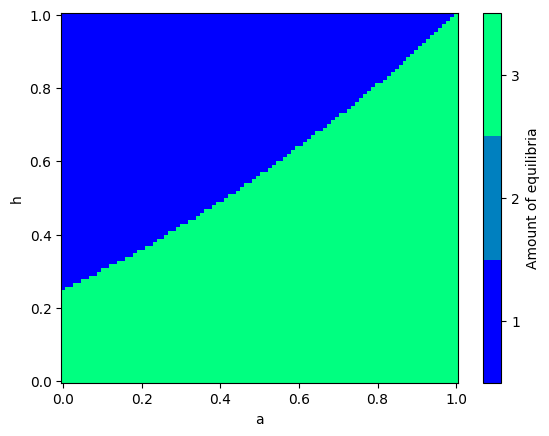

In [ ]:
a = np.linspace(0,1,100)
h = np.linspace(0,1,100)

z = get_array_of_amount_of_eq(a,h)

plt.xlabel('a')
plt.ylabel('h')
plt.pcolormesh(a,h,z,cmap = 'winter')
plt.colorbar(cmap = 'winter',values = [1,2,3], ticks = [1,2,3], label = 'Amount of equilibria')

We can see that there is no combination of $a$ and $h$ where the amount of equilibria is equal to 2, it instantly goes from 1 to 3 or 3 to 1. This can imply one of two things: there exists a pitchfork bifurcation on the line where the amount of equilibria goes from one to three (or vice versa), or it's a singular saddle-node bifurcation on the same point.  

In [ ]:
def get_stable_equilibria(points_of_equilibria,a,h):
    index_stable_eq = stability_at_x(points_of_equilibria,a,h) <= 0
    return points_of_equilibria[index_stable_eq]

In [ ]:
def get_unstable_equilibria(points_of_equilibria,a,h):
    index_unstable_eq = stability_at_x(points_of_equilibria,a,h) > 0
    return points_of_equilibria[index_unstable_eq]

Analogous to *show_system_ifo_r*, *show_system_ifo_h* will, when given a singular value for $a$, an array-like sequence of values for $h$ and a figure to plot on, return a visualisation of the points of equilibria in function of $h$.

In [ ]:
def show_system_ifo_h(a,h,ax):
    points_of_equilibria = get_roots_from_parameters(a,h)
    for i in range(len(points_of_equilibria)):
        stable_eq = get_stable_equilibria(points_of_equilibria[i],a,h[i])
        unstable_eq = get_unstable_equilibria(points_of_equilibria[i],a,h[i])

        shape_of_stable_eq = (len(stable_eq),)
        shape_of_unstable_eq = (len(unstable_eq),)

        if stable_eq.size > 0:
            ax.scatter(np.full(shape_of_stable_eq,h[i]),stable_eq,color = 'green',s = 5)
        if unstable_eq.size > 0:
            ax.scatter(np.full(shape_of_unstable_eq,h[i]),unstable_eq,color = 'red',s = 5)
    return

*Stability_at_x* will return the value of the derivative at $x$ for given values of $a$ and $h$. Note that we only care for the sign of the derivative evaluated in $x$. Hence, to avoid division by zero errors, we can say if $a+x = 0$, that the derivative will be a large negative number, but since we only care for the sign, we will set it equal to $-1$ in this situation.

In [ ]:
def stability_at_x(x,a,h):
    try:
        deriv = (-2*x + 1 - ((h*a)/((a+x)**2)))
    except ZeroDivisionError:
        deriv = np.full(np.shape(x),-1)
    return deriv

We are now able to visualise our system in function of $h$ for set values of $a$.

<ipython-input-29-69353450cdfc>:3: RuntimeWarning: invalid value encountered in divide
  deriv = (-2*x + 1 - ((h*a)/((a+x)**2)))


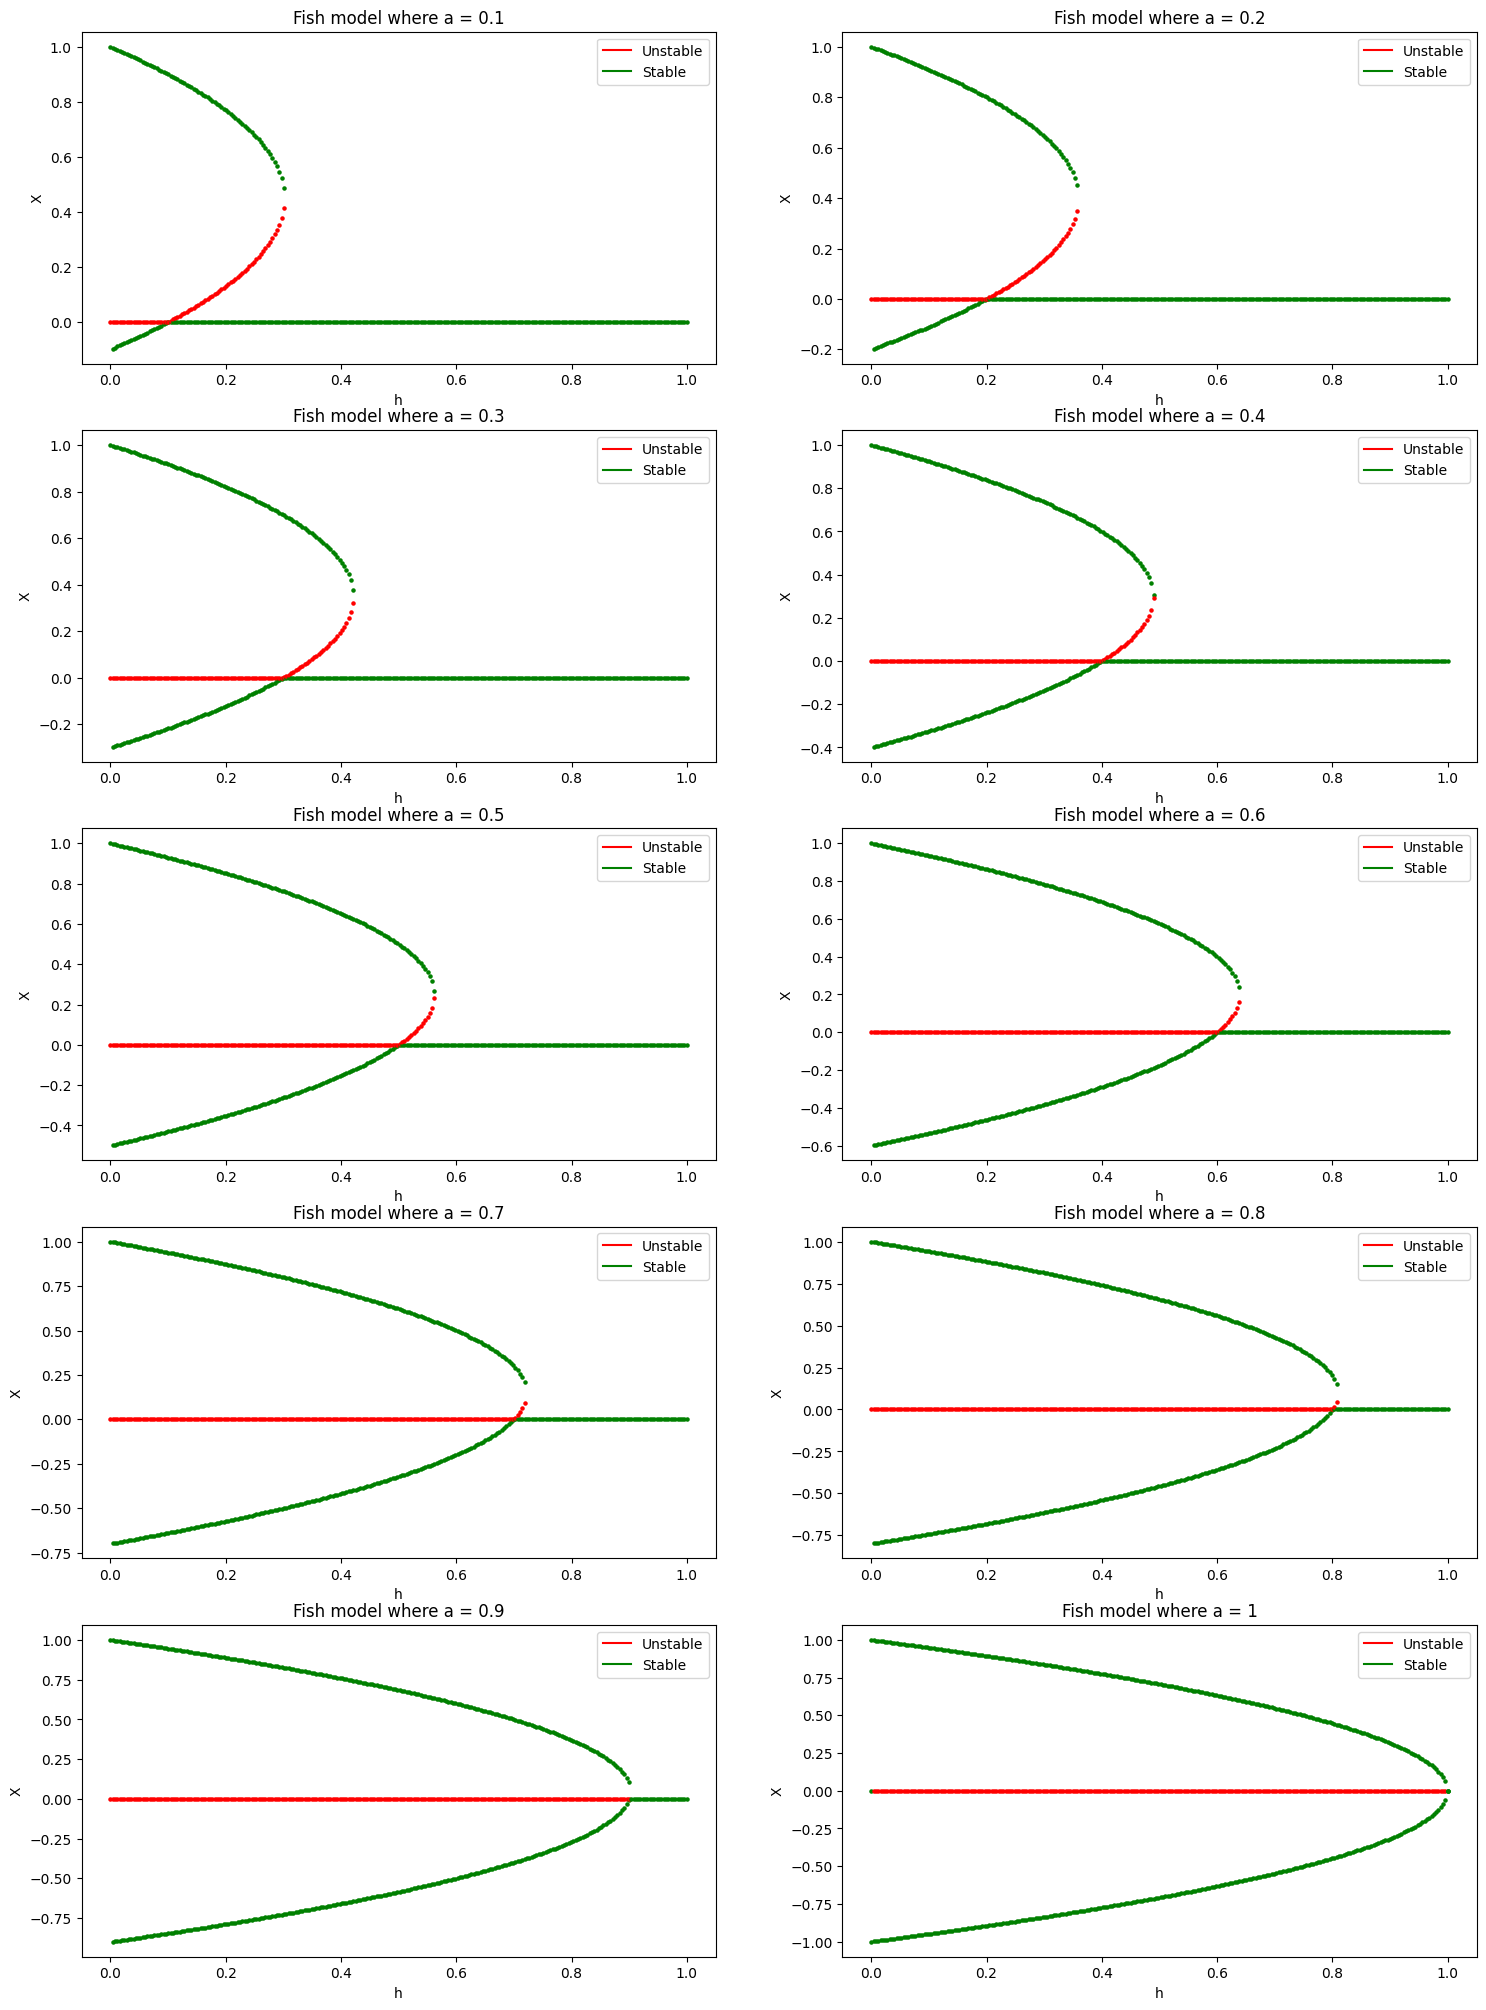

In [ ]:
fig,axs = plt.subplots(5,2,figsize = (18,25))

a = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in range(len(a)):
    show_system_ifo_h(a[i],np.linspace(0,1,250),axs[i//2,i%2])
    axs[i//2,i%2].set_ylabel('X')
    axs[i//2,i%2].set_xlabel('h')
    axs[i//2,i%2].set_title(f'Fish model where a = {a[i]}')
    axs[i//2,i%2].plot(0,0,color = 'red', label = 'Unstable')
    axs[i//2,i%2].plot(0,0,color = 'green', label = 'Stable')
    axs[i//2,i%2].legend()

This is in line with our previous guess: for a>1 we can see a saddle-node bifurcation and a trans-critical bifurcation(at a = h). The latter was impossible to deduce from the previous graph, since it only impacts stability, and not the amount of equilibria. We can also observe that the closer a gets to 1, the more the bifurcations converge to a pitchfork bifurcation, and eventually, for a = 1 we can see a pitchfork bifurcation.

This is also in accordance with our physical interpretations of the parameters and variables previously mentioned: if the effectiveness of the fishing methods $h$ is zero, the system will converge to a state where the max capacity of fishes is achieved. The larger the evasiveness of the fishes or skepticism to go for bait $a$, the harder it will be to supress the fish population, since a stable $X=0$ equilibrium for $a=1$, implies a $h=1$. i.e. the fishers have to be very effective fishers, or do a great amount of fishing in order to kill the entire fish population.

We will now make a 3D graph which will essentially combine the previously mentioned 10 graphs.

*filter_negative* is a function which will filter all the negative solutions from its array-like **points_of_equilibria** input.

In [ ]:
def filter_negative(points_of_equilibria):
    index_positive_or_zero = (points_of_equilibria) >= 0
    return points_of_equilibria[index_positive_or_zero]

*show_3d_plot* analogous to the previous show functions, will generate a 3d visualisation for given array-like sequences of values for $a$ and $h$. It also takes a figure as an argument to plot on, and an optional azimuth argument, which will alter the perspective of the 3d plot.

In [ ]:
def show_3d_plot(a,h,ax,azi=-150):
    A,H = np.meshgrid(a,h)
    points_of_equilibria = get_roots_from_parameters(A.flatten(),H.flatten())
    for i in range(len(points_of_equilibria)):
        positive_eq = filter_negative(points_of_equilibria[i])

        unstable_eq = get_unstable_equilibria(*extend_coefficients((positive_eq,A.flatten()[i],H.flatten()[i])))                    #the extend_coefficients function here is necessary since A[i] or H[i] and positive_eq don't necessarily
        stable_eq = get_stable_equilibria(*extend_coefficients((positive_eq,A.flatten()[i],H.flatten()[i])))                        #have an equal amount of elements, the * is for extracting the values in the tuple

        shape_unstable_eq = (len(unstable_eq),)
        shape_stable_eq = (len(stable_eq),)

        if unstable_eq.size > 0:
            ax.scatter(np.full(shape_unstable_eq,A.flatten()[i]),np.full(shape_unstable_eq,H.flatten()[i]),unstable_eq,color = 'red')      #We need to extend A.flatten()[i] and H... again for the same reason;
        if stable_eq.size > 0:                                                                                                             #They don't necessarily have the same amount of elements as (un)stable_eq
            ax.scatter(np.full(shape_stable_eq,A.flatten()[i]),np.full(shape_stable_eq,H.flatten()[i]),stable_eq,color = 'green')

    #Now for some further decoration and visual aspects to the plot
    ax.plot(0,0,0,color = 'green', label = 'Stable')
    ax.plot(0,0,0,color= 'red', label = 'Unstable')
    ax.set_ylabel('h')
    ax.set_xlabel('a')
    ax.set_zlabel('x')
    ax.legend()
    ax.set_title('3D model of the fish population')
    ax.view_init(elev=5, azim=azi, roll=0)



We are now able to visualise our 3d plot using the previously defined functions:

<ipython-input-29-69353450cdfc>:3: RuntimeWarning: invalid value encountered in divide
  deriv = (-2*x + 1 - ((h*a)/((a+x)**2)))


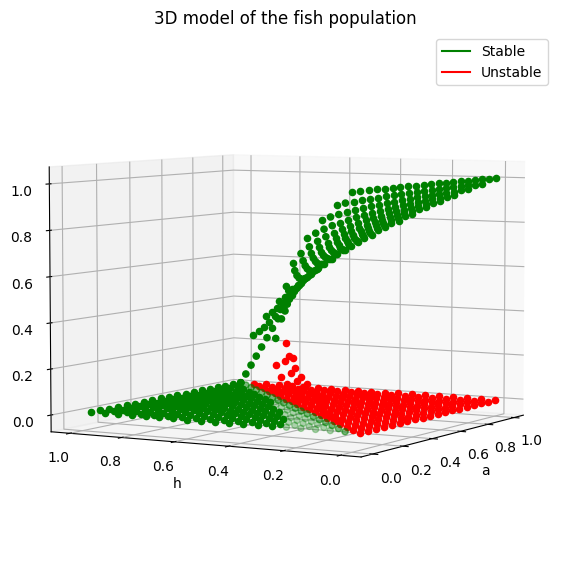

In [ ]:
ax1 = plt.figure(figsize = (7,7)).add_subplot(projection='3d')
a = np.linspace(0,1,20)
h = np.linspace(0,1,20)

show_3d_plot(a,h,ax1)

This 3d graph lets us conclude that at $a = h$ we have a transcritical bifurcation, unless $a=h=1$, where we can find a pitchfork bifurcation. We can also see that the closer $a$ is to $0$, the further we find the saddle-node bifurcation from the $a=h$ line. This very saddle-node bifurcation is what determines the position of our tipping point, hence for smaller $a$, the greater the distance of the saddle-node bifurcation to the $ah$-plane. And so if a system is at the upper stable equilibrium, a shift in parameter $a$ can result in a dropdown to the $ah$-plane.

Now to give a more general definition for a tipping point, we will resort to one of our previously mentioned graphs:

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
show_system_ifo_h(0.5,np.linspace(0,1,250),ax)
show_system_ifo_h(0.5,np.linspace(0,1,250),ax)
ax.set_ylabel('X')
ax.set_xlabel('h')
ax.set_title(f'Fish model where a = {0.5}')
ax.plot(0,0,color = 'red', label = 'Unstable')
ax.plot(0,0,color = 'green', label = 'Stable')
ax.legend()
ax.set_ylim(-0.1,1)
ax.set_xlim(0,1)

y = np.linspace(0,1,50)
frames = 20

lines = ax.plot([],linestyle = '--', color = 'blue')
line = lines[0]

def animate(frame):
    if frame/frames > 0.5:
        x = 0.6
        y = np.linspace(0,1,2)
    else:
        x = frame/frames
        y = np.linspace(-0.85*x+1,1,2)
    line.set_data((x,y))

anim = FuncAnimation(fig,animate,frames=frames,interval=200)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

<ipython-input-29-69353450cdfc>:3: RuntimeWarning: invalid value encountered in divide
  deriv = (-2*x + 1 - ((h*a)/((a+x)**2)))
<ipython-input-34-f985598879d5>:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data((x,y))


Suppose $a = 0.5$ is a constant value, and let $h$ vary. Consider a system that can be found near the equilibrium point $X=1$ for $h=0$. We can see for shifts in $h$, the system's point of equilibrium will shift as well. And so forth till our state reaches the saddle-node bifurcation, where our stable equilibrium ceases to exist if we shift parameter $h$ even more. By definition, our system will converge to the nearest point of equilibrium, being at $X=0$. If we look at our physical interpretation of the system; suppose we have a fish pond with our fish population being near its maximum capacity ($X$ near $1$) when there are no fishers ($h$ = 0). We can see if we add a small amount of fishers, that $X$ stays somewhat the same, a large population can compensate for the small loss through reproduction. Suppose we add a lot of fishers, at a certain point the population cannot compensate any longer for the loss due to fishing, it's at this point (the value of $h$ where the saddle-node bifurcation is) or **tipping** point, where the fish will simply die out because the loss caused by the fishers is too large for the fish population's reproduction capabilities.